In [35]:
from mgf_file_utils import parse_mgf
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from sklearn.linear_model import LinearRegression
import re
import seaborn as sns

In [3]:
file1_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
file2_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')
chimeric_scans = parse_mgf('Chimeric Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1_Trial_1_1inserts.mgf')

In [4]:
series1_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.1875.1875.2']

series2_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10553.10553.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5799.5799.2']

series3_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.6157.6157.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4424.4424.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12144.12144.2']

series4_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8276.8276.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4570.4570.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3392.3392.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.13552.13552.3']

series5_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.11221.11221.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12666.12666.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10079.10079.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.2190.2190.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4203.4203.2']

series6_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.6635.6635.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4595.4595.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8003.8003.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5724.5724.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12025.12025.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3311.3311.2']

series7_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3415.3415.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.9460.9460.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8227.8227.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12252.12252.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.13523.13523.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8329.8329.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10413.10413.2']

In [5]:
series1_scans = [scan for scan in file2_scans if scan.title in series1_titles]
series2_scans = [scan for scan in file2_scans if scan.title in series2_titles]
series3_scans = [scan for scan in file2_scans if scan.title in series3_titles]
series4_scans = [scan for scan in file2_scans if scan.title in series4_titles]
series5_scans = [scan for scan in file2_scans if scan.title in series5_titles]
series6_scans = [scan for scan in file2_scans if scan.title in series6_titles]
series7_scans = [scan for scan in file2_scans if scan.title in series7_titles]

In [7]:
mgftest1 = pd.read_csv('Original Spectra Files\Output Files\psm_1_mgftest.tsv', sep='\t')
mgftest2 = pd.read_csv('Original Spectra Files\Output Files\psm_2_mgftest.tsv', sep='\t')

new_theoretical1 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_1_new_theoretical.tsv', sep='\t')
new_theoretical2 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_2_new_theoretical.tsv', sep='\t')
new_theoretical3 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_1_new_theoretical.tsv', sep='\t')
new_theoretical4 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_2_new_theoretical.tsv', sep='\t')
new_theoretical5 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_1_new_theoretical.tsv', sep='\t')
new_theoretical6 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_2_new_theoretical.tsv', sep='\t')
new_theoretical7 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical8 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_2_new_theoretical.tsv', sep='\t')
new_theoretical9 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical10 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_2_new_theoretical.tsv', sep='\t')

new_theoretical1['Data Frame Number'] = 0
new_theoretical2['Data Frame Number'] = 1
new_theoretical3['Data Frame Number'] = 2
new_theoretical4['Data Frame Number'] = 3
new_theoretical5['Data Frame Number'] = 4
new_theoretical6['Data Frame Number'] = 5
new_theoretical7['Data Frame Number'] = 6
new_theoretical8['Data Frame Number'] = 7
new_theoretical9['Data Frame Number'] = 8
new_theoretical10['Data Frame Number'] = 9

new_theoretical = pd.concat([new_theoretical1, new_theoretical2, new_theoretical3, 
                             new_theoretical4, new_theoretical5, new_theoretical6, new_theoretical7,
                             new_theoretical8, new_theoretical9, new_theoretical10], ignore_index=True, axis=0)
fixed1_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed2_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed3_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_1.mgf')
fixed4_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_2.mgf')
fixed5_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_1.mgf')
fixed6_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_2.mgf')
fixed7_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed8_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed9_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
fixed10_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')

fixed_scans = [fixed1_scans, fixed2_scans, fixed3_scans, fixed4_scans, fixed5_scans, 
               fixed6_scans, fixed7_scans, fixed8_scans, fixed9_scans, fixed10_scans]

mgftest1['Scan Number'] = mgftest1['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_1\.)\d+(?=\.)', row)[0])))
mgftest2['Scan Number'] = mgftest2['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_2\.)\d+(?=\.)', row)[0])))

In [ ]:
# If the scan number came from a particular psm does that mean the scan will only be in the corresponding fixed mgf? 
# are the scan numbers globally unique? Unique across fixed mfgs? 

In [8]:
for scan in series1_scans :
    peptide = mgftest2.loc[mgftest2['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
    scan_title = new_theoretical.loc[new_theoretical['Peptide'] == peptide, 'Spectrum'].iloc[0]
    scan_number = str(int(re.search('(?<=2mz_2\.)\d+(?=\.)', scan_title)[0]))
    for s in fixed8_scans :
        if s.scan_num == scan_number :
            series1_alt_scan = s

In [9]:
file1_scans_with_alt_scan_indexes = []
file1_alt_scan_nums = []
file1_alt_scan_df_nums = []
file1_alt_scans = []
for index, scan in enumerate(file1_scans) :
    if not mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].empty :
        peptide = mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
        if not new_theoretical.loc[new_theoretical['Peptide'] == peptide, ['Spectrum', 'Data Frame Number']].empty :
            scan_title, df_num = new_theoretical.loc[new_theoretical['Peptide'] == peptide, ['Spectrum', 'Data Frame Number']].iloc[0]
            scan_number = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', scan_title)[0]))
            file1_scans_with_alt_scan_indexes.append(index)
            file1_alt_scan_nums.append(scan_number)
            file1_alt_scan_df_nums.append(df_num)
file1_alt_scans_info = pd.DataFrame({'Chimeric Index':file1_scans_with_alt_scan_indexes,
                                     'Alt Scan Num': file1_alt_scan_nums,
                                     'Data Frame Num': file1_alt_scan_df_nums})

In [15]:
file1_alt_scans_info['Scan'] = None
for df_num, fixed_scan in enumerate(fixed_scans) :
    for scan in fixed_scan :
        if scan.scan_num in file1_alt_scans_info.loc[file1_alt_scans_info['Data Frame Num'] == df_num, 'Alt Scan Num'].values :
            file1_alt_scans_info.loc[(file1_alt_scans_info['Alt Scan Num'] == scan.scan_num) & (file1_alt_scans_info['Data Frame Num'] == df_num), 'Scan'] = scan

In [17]:
chimeric_scans_with_alt_scan = [chimeric_scans[index] for index in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Chimeric Index'].values]
all_scans = chimeric_scans_with_alt_scan + list(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan'].values) + [series1_alt_scan]

In [18]:
unique_m_zs = list(set(float(m_z) for scan in all_scans for m_z in scan.m_z))
unique_m_zs.sort()
# step = 1e-7
# m_z_values = list(np.arange(unique_m_zs[0], unique_m_zs[-1]+step, step=step))

In [ ]:
dfs = []
for scan in scans :
    intensity = np.zeros(len(unique_m_zs))
    scan.m_z = [float(i) for i in scan.m_z]
    scan.intensity = [float(i) for i in scan.intensity]
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    intensity[indexes] = scan.intensity
    df = pd.DataFrame({scan.title: intensity}, index=unique_m_zs)
    dfs.append(df)
A = pd.concat(dfs, axis=1)

In [19]:
def combine_duplicates(scan):
    m_z_new = []
    intensities_new = []

    seen_m_z = set()  # Keep track of seen m_z values

    for m_z, intensity in zip(scan.m_z, scan.intensity):
        if m_z not in seen_m_z:
            seen_m_z.add(m_z)
            m_z_new.append(float(m_z))
            intensities_new.append(float(intensity))
        else:
            # If m_z is a duplicate, find its index and update the intensity
            index = m_z_new.index(float(m_z))
            intensities_new[index] += float(intensity)

    return m_z_new, intensities_new    

In [33]:
series1_alt_scan_intensity = np.zeros(len(unique_m_zs))
series1_alt_scan.m_z = [float(i) for i in series1_alt_scan.m_z]
series1_alt_scan.intensity = [float(i) for i in series1_alt_scan.intensity]
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_alt_scan.m_z)))[0]
series1_alt_scan_intensity[indexes] = series1_alt_scan.intensity

correct_scores = []
correct_coefficients = []
one_wrong_scores = []
one_wrong_coefficients = []
bad_scores = []
bad_coefficients = []

i = 0
for chimeric_index, scan in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), ['Chimeric Index', 'Scan']].values :
    scan = chimeric_scans[chimeric_index]
    scan.m_z, scan.intensity = combine_duplicates(scan)
    chimeric_intensity = np.zeros(len(unique_m_zs))
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0] # potential problem, what if chimeric spectra 
                                                                              # has m_z values that didn't occur in the original spectra? 
    chimeric_intensity[indexes] = scan.intensity

    file1_intensity = np.zeros(len(unique_m_zs))
    scan.m_z = [float(i) for i in scan.m_z]
    scan.intensity = [float(i) for i in scan.intensity]
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    file1_intensity[indexes] = scan.intensity

    A = pd.DataFrame({series1_alt_scan.title: series1_alt_scan_intensity,
                      scan.title: file1_intensity}, index=unique_m_zs)
    b = np.array(chimeric_intensity)
    model = LinearRegression(fit_intercept=False, positive=True)
    model.fit(A, b)
    correct_scores.append(np.linalg.norm(model.predict(A)-b))
    correct_coefficients.append(model.coef_)

    if i >= 1 :
        A = pd.DataFrame({'one_ago': one_ago, 
                          'current':file1_intensity}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        one_wrong_scores.append(np.linalg.norm(model.predict(A)-b))
        one_wrong_coefficients.append(model.coef_)

    if i >= 2 :
        A = pd.DataFrame({'one_ago': one_ago,
                          'two_ago': two_ago}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        bad_scores.append(np.linalg.norm(model.predict(A)-b))
        bad_coefficients.append(model.coef_)


    if i >= 1 :
        two_ago = one_ago
    one_ago = file1_intensity

    i += 1

    if i % 200 == 0 : 
        print(index/len(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan']))
        break

0.0642162471395881


In [48]:
one_wrong_scores

[7.609378613179393e-12,
 8.407870035815907e-12,
 1.8200137177635304e-10,
 9.127785861297175e-11,
 8.531816565343306e-12,
 3.697881758692027e-12,
 7.765734771027412e-12,
 1.1150007225437382e-11,
 4.324883998601042e-11,
 1.995195904644816e-12,
 3.0258857632381026e-11,
 0.0,
 1.7173110893768263e-11,
 3.366842354771481e-12,
 2.8559147776170145e-12,
 0.0,
 1.8124927037437646e-12,
 0.0,
 6.757443423526412e-12,
 2.7847474288855415e-12,
 9.774889782010172e-11,
 4.166277495143889e-12,
 3.171915093851953e-11,
 1.0904495253635906e-11,
 4.332053314574265e-12,
 5.242002077610467e-12,
 6.958154584981165e-12,
 1.551715916175732e-11,
 0.0,
 2.6867160836665048e-11,
 1.3473688992300784e-11,
 1.7353818032596795e-12,
 4.850046254364666e-12,
 5.56869221251942e-10,
 6.3502011670466075e-12,
 9.129697224540838e-12,
 4.561675840603863e-12,
 4.31041062784944e-11,
 1.429112255253114e-11,
 4.664222923457477e-10,
 2.174957270393519e-12,
 8.73171163190019e-12,
 1.9984322342733034e-12,
 1.2065275094761069e-11,
 1.15

In [55]:
correct_coefficients

[array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1.

<Axes: ylabel='Count'>

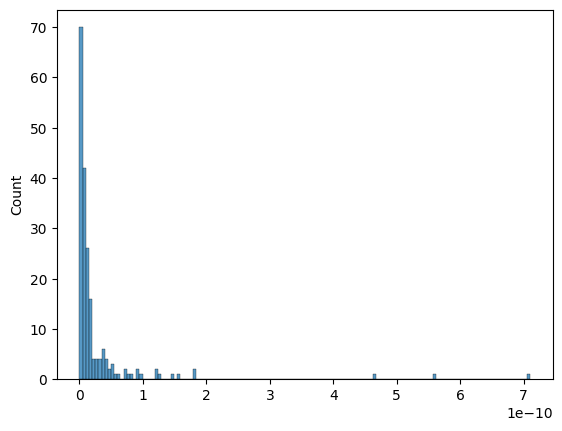

In [43]:
sns.histplot(correct_scores)

<Axes: ylabel='Count'>

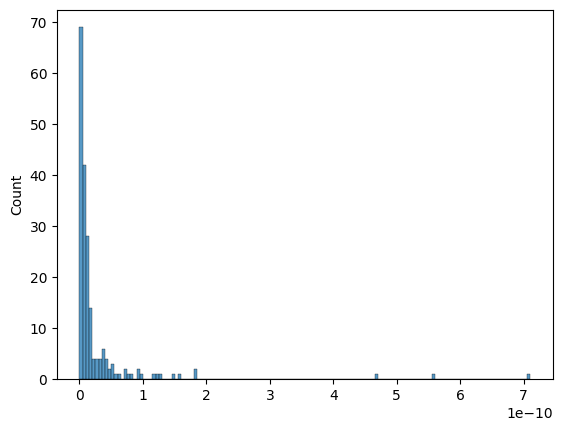

In [44]:
sns.histplot(one_wrong_scores)

In [52]:
np.amin(bad_scores)

7404.448454312593

<Axes: ylabel='Count'>

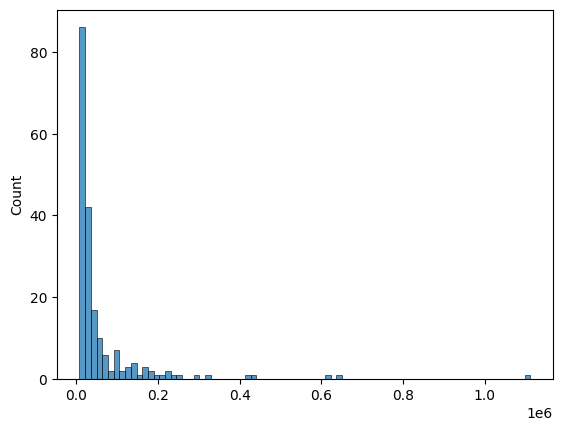

In [49]:
sns.histplot(bad_scores)

<Axes: ylabel='Count'>

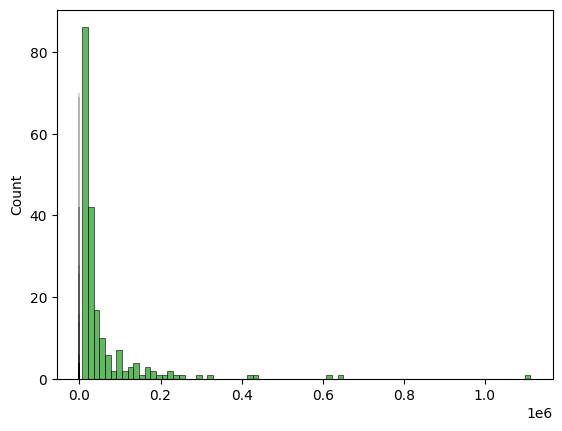

In [42]:
target = pd.DataFrame({'score': correct_scores, 'target_decoy': 'target'})
one_right = pd.DataFrame({'score': one_wrong_scores, 'target_decoy': 'one wrong'})
decoy = pd.DataFrame({'score':bad_scores, 'target_decoy': 'decoy'})
scores = pd.concat([target, one_right, decoy], ignore_index=True, axis=0)





In [ ]:
b = chimeric_spectra[0]
x, residual = nnls(A, b)
print(x)
print(residual)

model = LinearRegression(fit_intercept=False, positive=True)
model.fit(A, b)
print('NNLS coef', model.coef_)
print('NNLS residual', np.linalg.norm(model.predict(A)-b))


x = np.linalg.pinv(A) @ b
residual = np.linalg.norm((A@x) - b)
print(x)
print(residual)